In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
import string
import jieba
import os
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import codecs

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC



**1. Load spam and ham data sets**

In [5]:
# ham list
with open('ham_5000.utf8', encoding='utf-8') as f:
    ham_list = f.readlines()
# spam list
with open('spam_5000.utf8', encoding='utf-8') as f:
    spam_list = f.readlines()

Length of ham:  944638
Length of spam:  613886


**2. Tokenize**

In [48]:
#import jieba.analyse
#ham_preprocessed = jieba.analyse.extract_tags(ham_text, 1000)
#spam_preprocessed = jieba.analyse.extract_tags(spam_text, 1000)

In [63]:
# load stopwords
stopwords = codecs.open('stopwords.txt', 'r', 'utf8').read().split('\n')

# remove stopwords
def removeStopwords(text_list):
    text_preprocessed = []
    for text in text_list:
        words = []
        seg_list = jieba.cut(text)
        for seg in seg_list:
            if (seg.isalpha()) and seg not in stopwords:
                words.append(seg)
        sentence = ' '.join(words)
        text_preprocessed.append(sentence)
    return text_preprocessed

# remove stopwords for ham text
ham_preprocessed = removeStopwords(ham_list)
# remove stopwords for spam text
spam_preprocessed = removeStopwords(spam_list)

**3. Visualize data sets**

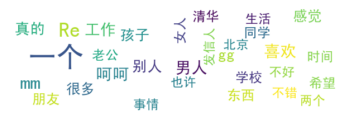

In [70]:
def visualize(content):
    wc_conf = WordCloud(
        background_color = "white",
        max_words = 30,
        font_path = "simhei.ttf",
        min_font_size = 15,
        max_font_size = 50,
        width = 600
    )
    wc_ins = wc_conf.generate(content)
    plt.imshow(wc_ins, interpolation='bilinear')
    plt.axis('off')

visualize(' '.join(ham_preprocessed))

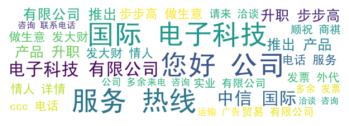

In [71]:
visualize(' '.join(spam_preprocessed))

In [101]:
def transformTextToSparseMat(text):
    vectorizer = CountVectorizer(binary=False)
    vector = vectorizer.fit_transform(text)
    vol = vectorizer.vocabulary_
    data = pd.DataFrame(vector.toarray())
    df = pd.DataFrame(vol.items(), columns=['key', 'value'])
    colnames = df.sort_values("value")["key"].values
    data.columns = colnames
    return data

In [120]:
data = []
data.extend(ham_preprocessed)
data.extend(spam_preprocessed)

full_features = transformTextToSparseMat(data)

In [164]:
features = pd.DataFrame(full_features.apply(sum,axis=0))

useful_features =  features.loc[features[0] > 5]
useful_features = useful_features.index.to_list()

X = full_features[useful_features]

In [167]:
y = []
y.extend(np.ones(5000))
y.extend(np.zeros(5001))

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

clf_NB = BernoulliNB(alpha=1, binarize=True)
model = clf_NB.fit(train_X, train_y)

print(model.score(test_X, test_y))

0.9225387306346826
